<a href="https://colab.research.google.com/github/sreehari59/Polar-Embedding/blob/main/Hofstede_Google_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
def polar_list(list):
  
  right_polar_list = []
  left_polar_list = []
  for i in range(0,len(list)):
    
    left_polar_list.append(list[i][0].replace("-","_"))
    right_polar_list.append(list[i][1].replace("-","_"))

  return left_polar_list,right_polar_list

In [17]:
def alphabetical_list_creation(list):
  new_list = []
  
  for i in range(0,len(list)):
    index_0 = list[i][0].replace("-","_")
    index_1 = list[i][1].replace("-","_")
    
    if index_0 < index_1:
      val = index_0+"-"+index_1
      new_list.append(val)
      
    else:
      val = index_1+"-"+index_0
      new_list.append(val)
      
  return new_list

In [18]:
def company_count(company_df,input_list,polar_embedding):  

  # we then find the number of companies grouped on the basis of location
  for i in input_list:
    #print(i)    
    j = i.replace("-","")
    #print(j)
    j = j.replace("_","-")
    subset_df2 = polar_embedding[polar_embedding[j] < 0]   
    company_inclined_to_left_polar_df1 = subset_df2['Location'].value_counts()
    left_polar = i.split("-")[0]
    #print(left_polar)
    company_inclined_to_left_polar_df1 = pd.DataFrame({'Country':company_inclined_to_left_polar_df1.index, left_polar :company_inclined_to_left_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_left_polar_df1, how='left',on='Country')    
    company_df[left_polar] = round( company_df[left_polar] / company_df.iloc[:,1] * 100)

    subset_df1 = polar_embedding[polar_embedding[j] > 0]
    company_inclined_to_right_polar_df1 = subset_df1['Location'].value_counts()
    right_polar = i.split("-")[1]
    #print(right_polar)
    company_inclined_to_right_polar_df1 = pd.DataFrame({'Country':company_inclined_to_right_polar_df1.index, right_polar :company_inclined_to_right_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_right_polar_df1, how='left',on='Country')    
    company_df[right_polar] = round( company_df[right_polar] / company_df.iloc[:,1] * 100)


  company_df = company_df.fillna(0)

  # We are considering only the countries if the numberof companies in the country is over 3
  company_df = company_df[company_df['Total Count'] > 3]

  return company_df

In [19]:
def polar_ranking(polar_list,total_score,ranking,company_df):
  total_sum=0
  total_sum_list=[]
  polar_ranking_list = []
  polar_index=0
  for index,row in company_df.iterrows():  
    
    for i in polar_list:
      
      total_sum = total_sum + (row[i])
    #print(company_df.iloc[index,2:])  
    total_sum_list.append(total_sum/len(polar_list))
    polar_ranking_list.append(index+1)
    total_sum = 0

  company_df[total_score] = total_sum_list
  company_df= company_df.sort_values(by=[total_score],ascending=False)
  company_df[ranking] = polar_ranking_list

  return company_df

In [26]:
list_powerdistance_random =[('make', 'break'), ('cameraman', 'playwright'), ('mystical', 'factual'), ('promotional', 'defamation'), ('iconic', 'unknown')]
nearest_random_list_powerdistance = [('making', 'breaks'), ('camerman', 'dramatist'), ('mystic', 'facts'), ('Promotional', 'libel'), ('Iconic', 'unkown')]
list_powerdistance =[('hierarchical','nonhierarchical'),('superior','equal'),('leader','subordinate'),('inequality','equality'),('autocrat','democrat')]
nearest_human_list_powerdistance = [('hierarchal', 'rigidhierarchical'), ('inferior', 'Equal'), ('leadership', 'subordinates'), ('inequalities', 'genderequality'), ('despot', 'democrats')]

In [27]:
list_individualism_random = [('lop', 'secure'), ('shah', 'poor'), ('pneumatic', 'solid'), ('interpret', 'misinterpret'), ('confer', 'refuse')]
nearest_random_list_individualism = [('lopped', 'securing'), ('Pahlavi', 'poorer'), ('hydraulic', 'strong'), ('interpreting', 'misunderstand'), ('conferred', 'refusing')]
list_individualism = [('individuality','community'),('egotism','harmony'),('tasks','relationships'),('individual','groups'),('particularism','universalism')]
nearest_human_list_individualism = [('individualism', 'communities'), ('narcissism', 'harmonious'), ('mundanetasks', 'relationship'), ('individually', 'Groups'), ('exclusivism', 'universalist')]

In [28]:
list_masculinity_random = [('try', 'abstain'), ('fatalistic', 'freewill'), ('knowledgeable', 'uninformed'), ('confine', 'free'), ('fan', 'warm')]
nearest_random_list_masculinity = [('trying', 'abstaining'), ('fatalist', 'eternaldestiny'), ('knowledgable', 'ignorant'), ('confining', 'Free'), ('fans', 'Warm')]
list_masculinity = [('achievement', 'support'),('competitive', 'caring'),('assertive', 'submissive'),('ambitious', 'unambitious'),('sucess','cooperation')]
nearest_human_list_masculinity = [('acheivement', 'supporting'), ('competitve', 'compassionate'), ('assertiveness', 'subservient'), ('Ambitious', 'unimaginative'), ('success', 'bilateralcooperation')]

In [29]:
list_longterm_random = [('innovator', 'follower'), ('sensory', 'numb'), ('hedge', 'squander'), ('arachnid', 'serpent'), ('disclose', 'secrete')]
nearest_random_list_longterm = [('pioneer', 'devotee'), ('auditory', 'numbed'), ('hedges', 'squandered'), ('spider', 'serpents'), ('divulge', 'secretes')]
list_longterm = [('pragmatic','normative'),('progress','preserve'),('adapt','conserve'),('developing','stable'),('advance','retain')]
nearest_human_list_longterm = [('pragmatism', 'deontological'), ('progess', 'preserving'), ('adapting', 'conserving'), ('develop', 'stabile'), ('advancing', 'retaining')]

In [30]:
list_indulgence_random = [('diagnose', 'sicken'), ('intercourse', 'disconnection'), ('sensorys', 'sensorial'), ('emasculate', 'strengthen'), ('metropolitan', 'rural')]
nearest_random_list_indulgence = [('accuratelydiagnose', 'sickens'), ('sexualintercourse', 'disconnections'), ('auditory', 'sensory'), ('eviscerate', 'strengthening'), ('metro', 'Rural')]
list_indulgence = [('fulfillment','restriction'),('satisfaction','limitation'),('liberty','moderation'),('expand','direct'),('freedom','regulation')]
nearest_human_list_indulgence = [('fulfillments', 'restrictions'), ('Satisfaction', 'limitations'), ('freedom', 'Moderation'), ('broaden', 'indirect'), ('freedoms', 'regulations')]

In [31]:
list_uncertainity_avoidance_random = [('stretcher', 'compressor'), ('amalgamate', 'separate'), ('caretaker', 'assailant'), ('taker', 'violator'), ('contaminate', 'sterilize')]
nearest_random_list_uncertainity_avoidance = [('stretchers', 'compressors'), ('merge', 'seperate'), ('Caretaker', 'assailants'), ('takers', 'violators'), ('contaminating', 'sterilized')]
list_uncertainity_avoidance = [('clarity','complexity'),('clear','ambiguous'),('certain','uncertain'),('uniformity','diversity'),('agreement','variation')]
nearest_human_list_uncertainity_avoidance = [('coherence', 'complexities'), ('crystalclear', 'vague'), ('these', 'unsure'), ('homogeneity', 'culturaldiversity'), ('agreements', 'variations')]

In [32]:
# Power distance 	, Individualism 	, Masculinity 	,  Long term orientation 	, Indulgence , Uncertainty avoidance
hof = "Masculinity"
dimension = hof+" index"
dimension_ranking = hof+" Ranking"

# The below line wil split the list into left polar and right polar. For example an antonym pair ('hierarchy', 'consensus-based') will have left polar = 'hierarchy' and right polar  = 'consensus-based'
left_polar_list_random,right_polar_list_random = polar_list(list_masculinity_random)
left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_masculinity)
left_polar_list_human,right_polar_list_human = polar_list(list_masculinity)
left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_masculinity)


input_list_random = alphabetical_list_creation(list_masculinity_random)
input_list_nearest_random = alphabetical_list_creation(nearest_random_list_masculinity)
input_list_human = alphabetical_list_creation(list_masculinity)
input_list_nearest_human = alphabetical_list_creation(nearest_human_list_masculinity)


In [33]:
input_list_nearest_random

['abstaining-trying',
 'eternaldestiny-fatalist',
 'ignorant-knowledgable',
 'Free-confining',
 'Warm-fans']

In [25]:
new_df = pd.read_csv('/content/drive/MyDrive/Polar Embedding/polar_embedding_gnews.csv')
new_df['Unnamed: 0'] = new_df['Unnamed: 0'].str.lower()
new_df['Unnamed: 0'] = new_df['Unnamed: 0'].str.replace("_","")

fortune_500_company = pd.read_csv('/content/drive/MyDrive/Polar Embedding/Fortune Global 500 companies.csv',encoding= 'unicode_escape')
fortune_500_company['Company'] = fortune_500_company['Company'].str.lower()
fortune_500_company['Company'] = fortune_500_company['Company'].str.replace(" ","")

polar_embedding = pd.merge(fortune_500_company,new_df,how="right",left_on="Company",right_on="Unnamed: 0")

polar_embedding= polar_embedding.drop(['Rank'],axis=1) # This will drop the column Rank
polar_embedding= polar_embedding.drop(['Unnamed: 0'],axis=1) # This will drop the column Rank

# This will find the total number of companies in our data frame based on Location
total_company_list_based_on_loc = polar_embedding['Location'].value_counts()
total_company_count_df = pd.DataFrame({'Country':total_company_list_based_on_loc.index, 'Total Count':total_company_list_based_on_loc.values})
print(total_company_count_df.head())

   Country  Total Count
0      USA           86
1    Japan           34
2  Germany           20
3    China           19
4   France           15


In [34]:
company_df=total_company_count_df.copy()  # This make a copy of data frame

#Below lines will find the number of companies aligned to the respective left word in antonym pair

company_df = company_count(company_df,input_list_random,polar_embedding)
company_df = company_count(company_df,input_list_nearest_random,polar_embedding)
company_df = company_count(company_df,input_list_human,polar_embedding)
company_df = company_count(company_df,input_list_nearest_human,polar_embedding)

#Below lines will find the total score based on the left word and final give a ranking
company_df = polar_ranking(left_polar_list_random,"Total Score Random","Polar Rank R",company_df)
company_df = polar_ranking(left_polar_list_nearest_random,"Total Score Nearest Random","Polar Rank Nearest R",company_df)
company_df = polar_ranking(left_polar_list_human,"Total Score Human","Polar Rank H",company_df)
company_df = polar_ranking(left_polar_list_nearest_human,"Total Score Nearest Human","Polar Rank Nearest H",company_df)

In [35]:
company_df.head()

,Country,Total Count,abstain,try,fatalistic,freewill,knowledgeable,uninformed,confine,free,...,bilateralcooperation,success,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H
12,Canada,4,25.0,75.0,50.0,50.0,25.0,75.0,0.0,100.0,...,0.0,100.0,50.0,9,55.0,7,65.0,4,70.0,10
8,Taiwan,6,0.0,100.0,100.0,0.0,50.0,50.0,0.0,100.0,...,0.0,100.0,56.6,4,60.0,5,60.0,2,63.4,13
1,Japan,34,41.0,59.0,59.0,41.0,35.0,65.0,9.0,91.0,...,6.0,94.0,39.4,15,60.6,4,62.8,5,61.8,2
9,Switzerland,6,50.0,50.0,33.0,67.0,50.0,50.0,33.0,67.0,...,0.0,100.0,46.6,10,63.4,1,70.0,11,60.2,3
11,Spain,5,0.0,100.0,40.0,60.0,60.0,40.0,60.0,40.0,...,20.0,80.0,64.0,3,56.0,15,56.0,7,60.0,5


In [36]:
# This will dop all the word pairs from the data fram
length = len(left_polar_list_random) + len(left_polar_list_nearest_random) + len(left_polar_list_human) + len(left_polar_list_nearest_human)
company_df.drop(company_df.iloc[:, 2:2+(length)*2], axis = 1, inplace = True)
company_df.head(7)

# This loads the Hofsted 6 dimension csv file
hofstede_df = pd.read_csv("/content/drive/MyDrive/Polar Embedding/Hofstede 6 dimensions.csv",sep=";")
hofstede_df=hofstede_df[hofstede_df.iloc[:,:]!="#NULL!" ]
hofstede_df.dropna(axis=0)

# This merge the company dataframe and Hofstede dataframe over the common column Country
merged_df = pd.merge(company_df, hofstede_df, how='left',on='Country')
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index
0,Canada,4,50.0,9,55.0,7,65.0,4,70.0,10,CAN,39,80,52,48,36,68
1,Taiwan,6,56.6,4,60.0,5,60.0,2,63.4,13,TAI,58,17,45,69,93,49
2,Japan,34,39.4,15,60.6,4,62.8,5,61.8,2,JPN,54,46,95,92,88,42
3,Switzerland,6,46.6,10,63.4,1,70.0,11,60.2,3,SWI,34,68,70,58,74,66
4,Spain,5,64.0,3,56.0,15,56.0,7,60.0,5,SPA,57,51,42,86,48,44
5,Britain,13,46.0,11,60.0,10,60.0,9,57.0,11,GBR,35,89,66,35,51,69
6,USA,86,51.6,6,58.8,3,59.8,8,55.4,9,USA,40,91,62,46,26,68
7,India,4,45.0,13,50.0,2,25.0,15,55.0,6,IND,77,48,56,40,51,26
8,Germany,20,45.0,12,68.0,9,62.0,3,53.0,1,GER,35,67,66,65,83,40
9,France,15,50.6,8,68.2,12,61.2,14,52.0,8,FRA,68,71,43,86,63,48


In [37]:
ranking_list = []
for i in range(1,len(merged_df[dimension])+1):
  ranking_list.append(i)
merged_df= merged_df.sort_values(by=[dimension],ascending=False)
merged_df[dimension_ranking] = ranking_list
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index,Masculinity Ranking
2,Japan,34,39.4,15,60.6,4,62.8,5,61.8,2,JPN,54,46,95,92,88,42,1
3,Switzerland,6,46.6,10,63.4,1,70.0,11,60.2,3,SWI,34,68,70,58,74,66,2
10,Italy,5,80.0,1,84.0,11,60.0,10,52.0,12,ITA,50,76,70,75,61,30,3
5,Britain,13,46.0,11,60.0,10,60.0,9,57.0,11,GBR,35,89,66,35,51,69,4
8,Germany,20,45.0,12,68.0,9,62.0,3,53.0,1,GER,35,67,66,65,83,40,5
12,China,19,50.6,7,74.6,14,43.4,12,45.4,4,CHI,80,20,66,30,87,24,6
6,USA,86,51.6,6,58.8,3,59.8,8,55.4,9,USA,40,91,62,46,26,68,7
7,India,4,45.0,13,50.0,2,25.0,15,55.0,6,IND,77,48,56,40,51,26,8
0,Canada,4,50.0,9,55.0,7,65.0,4,70.0,10,CAN,39,80,52,48,36,68,9
13,Brazil,4,75.0,2,65.0,8,35.0,13,45.0,14,BRA,69,38,49,76,44,59,10


Text(0, 0.5, 'Polar rank of Random list')

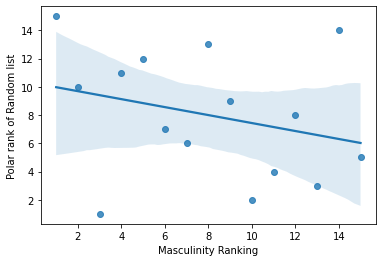

In [40]:
import matplotlib.pyplot as plt
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank R"])
plt.xlabel(dimension_ranking)
plt.ylabel("Polar rank of Random list")

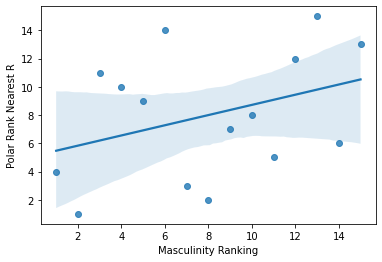

In [41]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest R"])

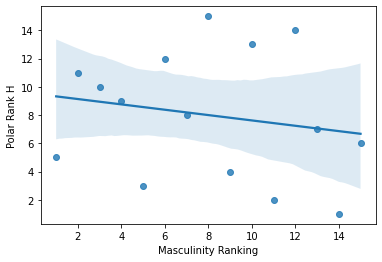

In [42]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank H"])

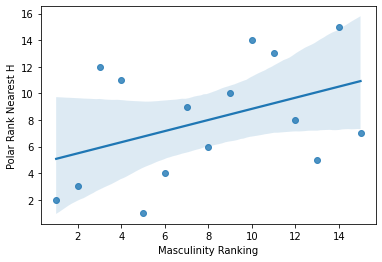

In [43]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest H"])

In [44]:

fig = go.Figure()
fig = make_subplots(rows=2, cols=2)

fig_name = "Hofstede "+dimension+"(Score)"

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),1,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Random"].astype(int), name = "Random Polar Score"),1,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),1,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Random"].astype(int), name = "Nearest Random Polar Score"),1,2)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),2,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Human"].astype(int), name = "Human Polar Score"),2,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),2,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Human"].astype(int), name = "Nearest Human Polar Score"),2,2) 

fig.show() 

In [45]:
def rmse_score(merged_df,dimension_ranking):
  rmse_list = []
  rmse_list.append(np.sqrt(mean_squared_error(merged_df[dimension], merged_df["Total Score Random"])))
  rmse_list.append(np.sqrt(mean_squared_error(merged_df[dimension], merged_df["Total Score Nearest Random"])))
  rmse_list.append(np.sqrt(mean_squared_error(merged_df[dimension], merged_df["Total Score Human"])))
  rmse_list.append(np.sqrt(mean_squared_error(merged_df[dimension], merged_df["Total Score Nearest Human"])))
  return rmse_list

In [46]:
def correlation_calc(merged_df,dimension_ranking):
  correlation = []
  correlation.append(merged_df["Polar Rank R"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank Nearest R"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank H"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank Nearest H"].corr(merged_df[dimension_ranking]))
  return correlation

In [47]:
def mean_absolute_error_score(merged_df,dimension_ranking):
  MAE_of_Score = []
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Random"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Random"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Human"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Human"]))
  return MAE_of_Score

In [48]:
def mean_absolute_error_rank(merged_df,dimension_ranking):
  MAE = []
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank R"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest R"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank H"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest H"]))
  return MAE

In [49]:
MAE = mean_absolute_error_rank(merged_df,dimension_ranking)
MAE_of_Score = mean_absolute_error_score(merged_df,dimension)
correlation_rank = correlation_calc(merged_df,dimension_ranking)
rmse = rmse_score(merged_df,dimension)

eval_data = {"Mean Absolute Error of Rank" : MAE,
              "Correlation" : correlation_rank,
             "RMSE of Score" : rmse
            }

eval_df = pd.DataFrame(eval_data, index =["Random List", "Nearest Random List","Human Made List","Nearest to Human Made List"])
eval_df.head()

,Mean Absolute Error of Rank,Correlation,RMSE of Score
Random List,5.600000,-0.282143,23.162844
Nearest Random List,4.133333,0.360714,19.066200
Human Made List,5.866667,-0.189286,19.480794
Nearest to Human Made List,3.733333,0.417857,17.804269
